In [142]:
import os
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
files = [f for f in os.listdir(r'\Users\ad846\Desktop\Projet Data\DATASET')]
for fichier in files:
    print(fichier)

.ipynb_checkpoints
April.csv
August.csv
December.csv
February.csv
January.csv
July.csv
June.csv
March.csv
May.csv
merge.bat
November.csv
October.csv
Projet Data.ipynb
September.csv


In [67]:
# On introduit une variable de chemin d'accès au fichier
path = r'\Users\ad846\Desktop\Projet Data\DATASET'
# Définir la dataframe
All_Sales_Data = pd.DataFrame()
 
for fichier in files:
    if fichier.endswith('.csv'):
        csv_file = pd.read_csv(path + '/' + fichier)
        All_Sales_Data = pd.concat([All_Sales_Data, csv_file], ignore_index=True)

In [68]:
All_Sales_Data.to_csv(path+'/All_Sales_Data.csv', index=False)

In [114]:
All_Sales_Data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month                int32
dtype: object

In [78]:
All_Sales_Data.isnull().sum()

Order ID              545
Product             15699
Quantity Ordered    15699
Price Each          15699
Order Date          15699
Purchase Address    15699
dtype: int64

In [136]:
All_Sales_Data = All_Sales_Data.dropna()

In [80]:
print(All_Sales_Data)

       Order ID                     Product Quantity Ordered Price Each  \
0        176558        USB-C Charging Cable                2      11.95   
2        176559  Bose SoundSport Headphones                1      99.99   
3        176560                Google Phone                1        600   
4        176560            Wired Headphones                1      11.99   
5        176561            Wired Headphones                1      11.99   
...         ...                         ...              ...        ...   
186845   259353      AAA Batteries (4-pack)                3       2.99   
186846   259354                      iPhone                1        700   
186847   259355                      iPhone                1        700   
186848   259356      34in Ultrawide Monitor                1     379.99   
186849   259357        USB-C Charging Cable                1      11.95   

            Order Date                         Purchase Address  
0       04/19/19 08:46           

In [89]:
All_Sales_Data = All_Sales_Data.drop_duplicates()

In [115]:
#Afficher la forme du tableau
All_Sales_Data.shape

(170557, 7)

In [101]:
def month(x):
    return str(x).split('/')[0]
All_Sales_Data['Month'] = All_Sales_Data['Order Date'].apply(month)
unique_months = All_Sales_Data['Month'].unique()
print(unique_months)

['04' '05' 'Order Date' '08' '09' '12' '01' '02' '03' '07' '06' '11' '10']


In [112]:
All_Sales_Data=All_Sales_Data[All_Sales_Data['Month']!='Order Date']
All_Sales_Data=All_Sales_Data[All_Sales_Data['Month']!='nan']

All_Sales_Data['Month'].unique()

array(['04', '05', '08', '09', '12', '01', '02', '03', '07', '06', '11',
       '10'], dtype=object)

In [113]:
All_Sales_Data['Month']=All_Sales_Data['Month'].astype(int)

In [124]:
All_Sales_Data.rename(columns={'Purchase Address': 'Address'}, inplace=True)

In [137]:
All_Sales_Data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9


In [139]:
All_Sales_Data['Quantity Ordered'] = pd.to_numeric(All_Sales_Data['Quantity Ordered'], errors='coerce')
All_Sales_Data['Price Each'] = pd.to_numeric(All_Sales_Data['Price Each'], errors='coerce')

# Assurez-vous que les colonnes 'Quantity Ordered' et 'Price Each' ne contiennent pas de valeurs nulles
All_Sales_Data = All_Sales_Data.dropna(subset=['Quantity Ordered', 'Price Each'])

# Appliquer la multiplication après conversion
All_Sales_Data['Total'] = All_Sales_Data['Quantity Ordered'] * All_Sales_Data['Price Each']


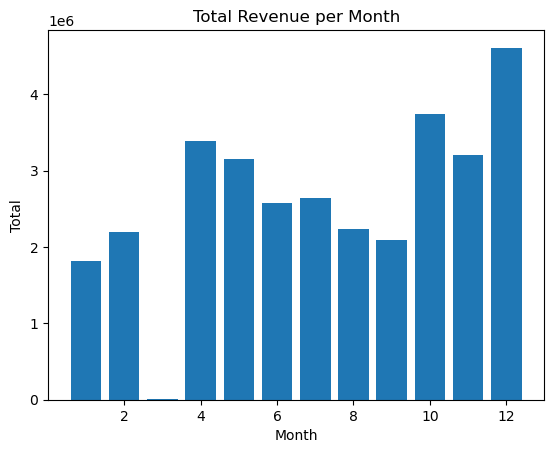

In [151]:
months = range(1, 13)
total_revenue_per_month = All_Sales_Data.groupby('Month')['Total'].sum()

plt.bar(months, total_revenue_per_month)
plt.xlabel('Month')
plt.ylabel('Total')
plt.title("Total Revenue per Month")
plt.show()

In [160]:
All_Sales_Data['City'] = All_Sales_Data['Address'].apply(lambda x: x.split(',')[1].strip())

In [161]:
city_sales = All_Sales_Data.groupby('City')['Total'].sum()
best_city = city_sales.idxmax()

print(f"La ville qui a enregistré le maximum de revenus est {best_city}")


L'adresse qui a enregistré le maximum de revenus est San Francisco


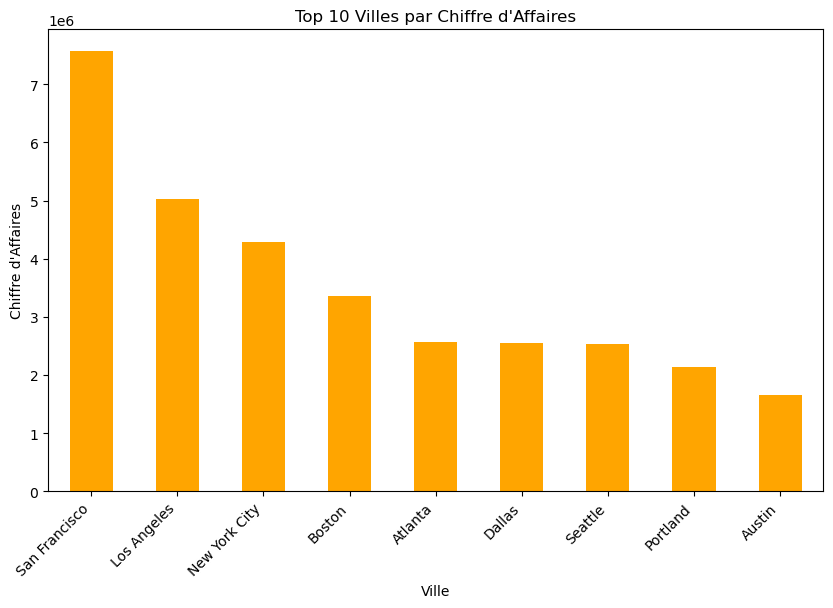

In [171]:
All_Sales_Data['Total'] = All_Sales_Data['Quantity Ordered'] * All_Sales_Data['Price Each']


top_10_cities = All_Sales_Data.groupby('City')['Total'].sum().nlargest(10)


plt.figure(figsize=(10, 6))
top_10_cities.plot(kind='bar', color='orange')
plt.title('Top 10 Villes par Chiffre d\'Affaires')
plt.xlabel('Ville')
plt.ylabel('Chiffre d\'Affaires')
plt.xticks(rotation=45, ha='right')  # Rotation des étiquettes pour une meilleure lisibilité
plt.show()


In [164]:
All_Sales_Data['Order Date'] = pd.to_datetime(All_Sales_Data['Order Date'], format='%m/%d/%y %H:%M')

In [166]:
All_Sales_Data['Heure'] = All_Sales_Data['Order Date'].dt.hour

In [167]:
# Ajouter la colonne 'Hour'
All_Sales_Data['Hour'] = All_Sales_Data['Order Date'].dt.hour

# Agréger les totaux par heure et trouver l'heure avec le chiffre d'affaires maximal
hourly_sales = All_Sales_Data.groupby('Hour')['Total'].sum()
best_hour = hourly_sales.idxmax()

print(f"Pour maximiser la probabilité d'achat, affichez des publicités à {best_hour} heures.")


Pour maximiser la probabilité d'achat, affichez des publicités à 19 heures.


In [168]:
best_selling_product = All_Sales_Data.groupby('Product')['Quantity Ordered'].sum().idxmax()

print(f"Le produit le plus vendu est {best_selling_product}")


Le produit le plus vendu est AAA Batteries (4-pack)


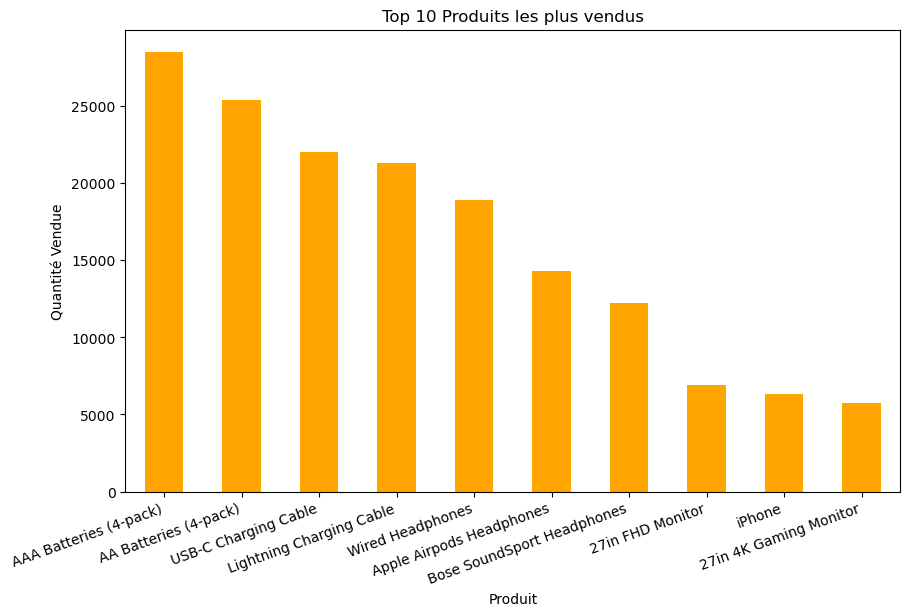

In [180]:
All_Sales_Data['Total'] = All_Sales_Data['Quantity Ordered'] * All_Sales_Data['Price Each']

# Agréger les quantités vendues par produit et trouver les 10 produits les plus vendus
top_10_products = All_Sales_Data.groupby('Product')['Quantity Ordered'].sum().nlargest(10)

# Tracer le graphique à barres
plt.figure(figsize=(10, 6))
top_10_products.plot(kind='bar', color='orange')
plt.title('Top 10 Produits les plus vendus')
plt.xlabel('Produit')
plt.ylabel('Quantité Vendue')
plt.xticks(rotation=20, ha='right')  # Rotation des étiquettes
plt.show()
